# Plot remapped  ICON data 

This notebook reads a model output from ICON and plots the ice number concentrations onto different projections. 

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mplcolors

In [2]:
# path to file
path_to_icon = '/work/bb1036/b381082/ICON/output_jan/output_remap/'
icon_output = path_to_icon + 'ICON_ACLOUD_DOM02_20170602T120000Z_0010_remap.nc'

In [3]:
# load data
data = xr.open_dataset(icon_output)

In [13]:
# to show netcdf file information just uncomment next line
# data

In [5]:
# save variables
time = data['time']
lon = data['lon']
lat = data['lat']
height = data['height']
temperature = data['temp']
nice_per_mass = data['qni'] # kg^-1
air_density = data['rho'] # kg*m^-3

In [6]:
data.close()

In [7]:
# calculate ice number concentration m^-3
nice = nice_per_mass * air_density
# convert m^-3 to L^-1
nice = nice/1000 
# show max and min value
nice.max(), nice.min()

(<xarray.DataArray ()>
 array(24433.19335938),
 <xarray.DataArray ()>
 array(0.))

In [8]:
# set a threshold for plotting (here 10 is set, due to extrapolation errors, just for illustration)
nice=nice.where(nice>10)

### Quick plot (xarray)

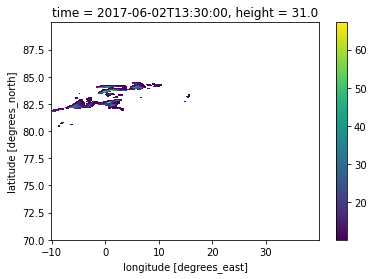

In [9]:
# quick plot
nice[3,30].plot()

In [10]:
# import libraries for plotting
from cartopy import crs as ccrs
from cartopy import feature as cfeature
from matplotlib import ticker as mticker

### Plot in North Polar Stereographic Projection

/sw/spack-rhel6/miniforge3-4.9.2-3-Linux-x86_64-pwdbqi/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1797: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)
/sw/spack-rhel6/miniforge3-4.9.2-3-Linux-x86_64-pwdbqi/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/sw/spack-rhel6/miniforge3-4.9.2-3-Linux-x86_64-pwdbqi/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility inst

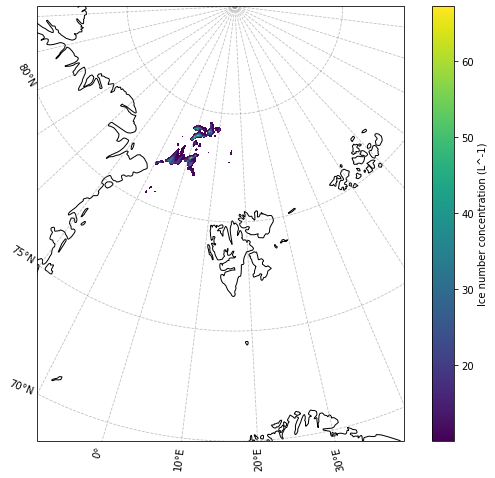

In [11]:
fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection=ccrs.NorthPolarStereo(central_longitude=17.0))
# ax = plt.axes(projection=ccrs.NearsidePerspective(central_longitude=17.0, central_latitude=71.0,
#                                                   satellite_height=35785831, false_easting=0, 
#                                                   false_northing=0, globe=None)) 

plt.pcolormesh(lon, lat, nice[3,30], transform=ccrs.PlateCarree())
ax.coastlines(resolution='50m')
lon_grid = np.arange(-100, 140, 10)
lat_grid = np.arange(-70, 90, 5)
gl = ax.gridlines(draw_labels=True,
                  xlocs=lon_grid, ylocs=lat_grid,
                  x_inline=False, y_inline=False,
                  color='gray', linestyle='--', alpha=0.5)
gl.xlabels_top = False
gl.ylabels_right=False
cbar = plt.colorbar(fraction=0.05, pad=0.05, label='Ice number concentration (L^-1)')



### Plot in Mercator Projection

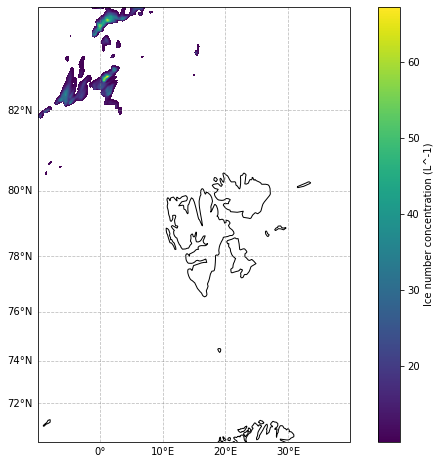

In [12]:
fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection=ccrs.Mercator(central_longitude=0.0)) 

plt.pcolormesh(lon, lat, nice[3,30], transform=ccrs.PlateCarree())
ax.coastlines(resolution='50m')
lon_grid = np.arange(-10, 40, 10)
lat_grid = np.arange(70, 90, 2)
gl = ax.gridlines(draw_labels=True,
                  xlocs=lon_grid, ylocs=lat_grid,
                  x_inline=False, y_inline=False,
                  color='gray', linestyle='--', alpha=0.5)
gl.xlocator = mticker.FixedLocator(lon_grid)
gl.xlines = True
gl.xlabels_top = False
gl.ylabels_right = False
cbar = plt.colorbar(fraction=0.05, pad=0.05, label='Ice number concentration (L^-1)')